C:\Users\david\AppData\Local\Temp\ipykernel_20384\455460764.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='country', data=sorted_country_data_desc, palette=palette, ax=ax, edgecolor='white')


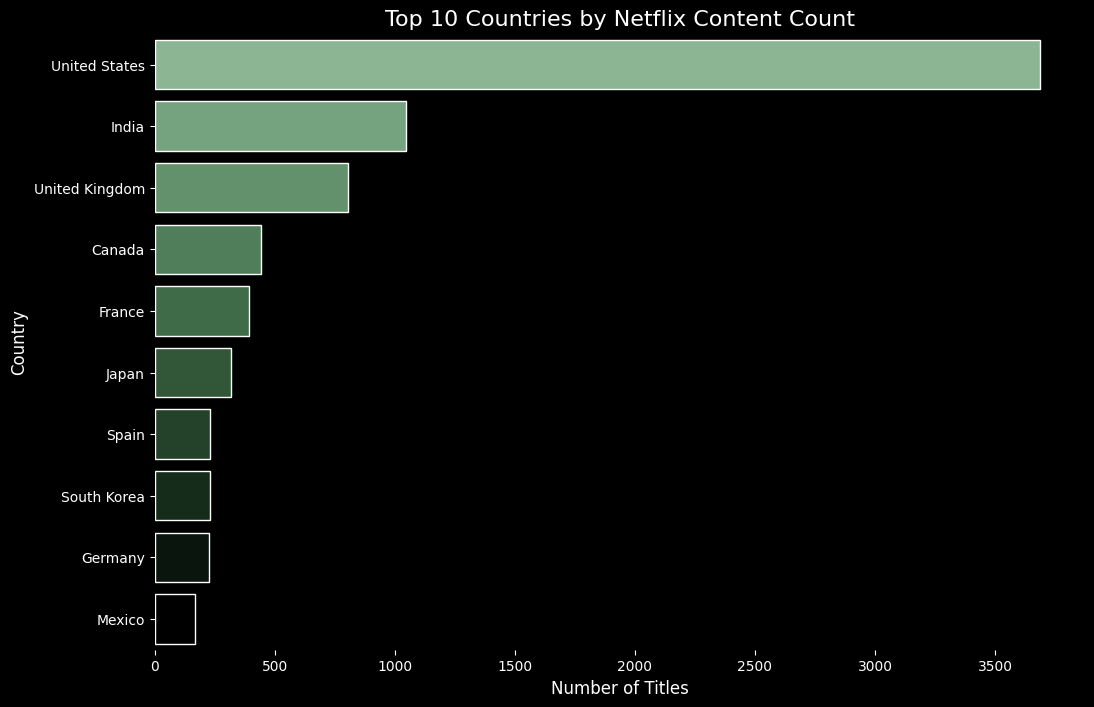

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
file_path = r"C:\Users\david\Downloads\fd\netflix_titles.csv"
netflix_data = pd.read_csv(file_path)

# Attempt to convert the date_added column to datetime, ignoring any parsing errors
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'], errors='coerce')

# Now extract the year, it will be NaN where the date_added was unparsable
netflix_data['year_added'] = netflix_data['date_added'].dt.year

# Counting the number of titles per country
country_count = netflix_data['country'].str.split(', ', expand=True).stack().value_counts()

# Convert the country count to a DataFrame
country_data = pd.DataFrame(country_count).reset_index()
country_data.columns = ['country', 'count']

# Sort the country data in descending order to get the top 10 countries
sorted_country_data_desc = country_data.sort_values('count', ascending=False).head(10)

# Set the matplotlib parameters for a dark background style
plt.style.use('dark_background')

# Creating the horizontal bar chart with sorted data
fig, ax = plt.subplots(figsize=(12, 8))

# Use a color palette for the bars
palette = sns.cubehelix_palette(n_colors=10, start=2, rot=0, dark=0, light=.65)

# Create the horizontal bar plot with sorted data, adding edgecolor for borders
sns.barplot(x='count', y='country', data=sorted_country_data_desc, palette=palette, ax=ax, edgecolor='white')

# Set the labels and title
ax.set_xlabel('Number of Titles', fontsize=12, color='white')
ax.set_ylabel('Country', fontsize=12, color='white')
ax.set_title('Top 10 Countries by Netflix Content Count', fontsize=16, color='white')

# Remove the grid lines and the spines
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Show the plot
plt.show()
